In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "D:\\2022lendingclub_ML\\"

In [2]:
data = pd.read_parquet(path + 'cleaned_accepted_2007_to_2018Q4.parquet', engine='fastparquet')

In [3]:
import datetime

data['data_group_year'] = 2021 - ((data['mths_since_issue_d'] - 1) / 12).apply(lambda x: int(x))
data['data_group_month'] = 12 - ((data['mths_since_issue_d'] - 1) % 12)
data['data_group_day'] = 1

cols = ['data_group_year', 'data_group_month', 'data_group_day']
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)
data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.strftime('%Y-%m-%d'))

In [4]:
yearly_count = data.groupby(by=data['data_group_year']).count()
monthly_count = data.groupby(by=data['date']).count()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138]),
 [Text(0, 0, '2007-06-01'),
  Text(1, 0, '2007-07-01'),
  Text(2, 0, '2007-08-01'),
  Text(3, 0, '2007-09-01'),
  Text(4, 0, '2007-10-01'),
  Text(5, 0, '2007-11-01'),
  Text(6, 0, '2007-12-01'),
  Text(7, 0, '2008-

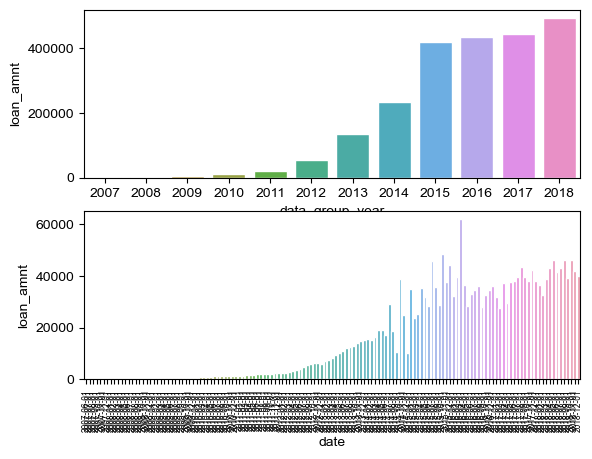

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.set_theme()
plt.rcParams["figure.figsize"] = [15, 15]
sns.barplot(data=yearly_count, x=yearly_count.index, y='loan_amnt', ax=axes[0])
sns.barplot(data=monthly_count, x=monthly_count.index, y='loan_amnt', ax=axes[1])
plt.xticks(rotation=90, fontsize=6)

In [7]:
# 选取2016Q1至2018Q4发放的贷款数据（占总数据的75%），对应的是mths_since_issue_d介于37（2018-12）和72（2016-01）之间的数据。电脑性能不足，只能先训练3年数据了。

sub_data = data.drop(columns=['data_group_year', 'data_group_month', 'data_group_day', 'date'])
sub_data = sub_data[(sub_data['mths_since_issue_d'] >= 37) & (sub_data['mths_since_issue_d'] <= 72)]

sub_data.to_parquet(path + '2016Q1_to_2018Q4.parquet')